<a href="https://colab.research.google.com/github/chloemaybrandon/UCLA_CS_M146/blob/main/CS146_Winter2025_Problem_Set_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset, DataLoader
from PIL import Image

In [ ]:
# To add your own Drive Run this cell.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
######################################################################
# OneLayerNetwork
######################################################################

class OneLayerNetwork(torch.nn.Module):
    def __init__(self):
        super(OneLayerNetwork, self).__init__()

        ### ========== TODO : START ========== ###
        ### part d: implement OneLayerNetwork with torch.nn.Linear

        # Implement the constructor of OneLayerNetwork with torch.nn.Linear
        # and implement the forward function to compute the outputs of the
        # single fully connected layer i.e. W⊤xn. Notice that we do not
        # compute the sigmoid function here since we will use
        # torch.nn.CrossEntropyLoss later.

        # Note: We want to learn a 784 × 3 weight matrix W.

        self.linearTransformation = torch.nn.Linear(784,3)


        ### ========== TODO : END ========== ###

    def forward(self, x):
        # x.shape = (n_batch, n_features)

        ### ========== TODO : START ========== ###
        ### part d: implement the foward function
        outputs = self.linearTransformation(x)

        ### ========== TODO : END ========== ###
        return outputs

In [ ]:
######################################################################
# TwoLayerNetwork
######################################################################

class TwoLayerNetwork(torch.nn.Module):
    def __init__(self):
        super(TwoLayerNetwork, self).__init__()
        ### ========== TODO : START ========== ###
        ### part g: implement TwoLayerNetwork with torch.nn.Linear

        # For two-layer network, we consider a 784–400–3 network.
        # In other words, the first layer will consist of a fully
        # connected layer with 784 × 400 weight matrix W1 and a
        #second layer consisting of 400 × 3 weight matrix W2.

        self.layer_1 = torch.nn.Linear(784, 400)
        self.layer_2 = torch.nn.Linear(400, 3)

        ### ========== TODO : END ========== ###

    def forward(self, x):
        # x.shape = (n_batch, n_features)

        ### ========== TODO : START ========== ###
        ### part g: implement the foward function

        outputs_forward = self.layer_1(x)
        outputs_l1 = torch.sigmoid(outputs_forward)
        outputs = self.layer_2(outputs_l1)

        ### ========== TODO : END ========== ###
        return outputs

In [ ]:
# load data from csv
# X.shape = (n_examples, n_features), y.shape = (n_examples, )
def load_data(filename):
    data = np.loadtxt(filename)
    y = data[:, 0].astype(int)
    X = data[:, 1:].astype(np.float32) / 255
    return X, y

In [ ]:
# plot one example
# x.shape = (features, )
def plot_img(x):
    x = x.reshape(28, 28)
    img = Image.fromarray(x*255)
    plt.figure()
    plt.imshow(img)
    return

In [ ]:
def evaluate_loss(model, criterion, dataloader):
    model.eval()
    total_loss = 0.0
    for batch_X, batch_y in dataloader:
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        total_loss += loss.item()

    return total_loss / len(dataloader)

In [ ]:
def evaluate_acc(model, dataloader):
    model.eval()
    total_acc = 0.0
    for batch_X, batch_y in dataloader:
        outputs = model(batch_X)
        predictions = torch.argmax(outputs, dim=1)
        total_acc += (predictions==batch_y).sum()

    return total_acc / len(dataloader.dataset)

In [ ]:
def train(model, criterion, optimizer, train_loader, valid_loader, epochs=31):
    train_loss_list = []
    valid_loss_list = []
    train_acc_list = []
    valid_acc_list = []
    for epoch in range(1, epochs):
        model.train()
        for batch_X, batch_y in train_loader:
            pass
            ### ========== TODO : START ========== ###
            ### part f: implement the training process
            # This includes forward pass, initializing
            # gradients to zeros, computing loss,
            # loss.backward, and updating model parameters

            # forward pass
            y_predict = model(batch_X)

            # initializing gradients to zeros
            optimizer.zero_grad()

            # computing loss
            loss = criterion(y_predict, batch_y)

            # loss.backward
            loss.backward()

            # updating model parameters
            optimizer.step()

            ### ========== TODO : END ========== ###

        train_loss = evaluate_loss(model, criterion, train_loader)
        valid_loss = evaluate_loss(model, criterion, valid_loader)
        train_acc = evaluate_acc(model, train_loader)
        valid_acc = evaluate_acc(model, valid_loader)
        train_loss_list.append(train_loss)
        valid_loss_list.append(valid_loss)
        train_acc_list.append(train_acc)
        valid_acc_list.append(valid_acc)

        print(f"| epoch {epoch:2d} | train loss {train_loss:.6f} | train acc {train_acc:.6f} | valid loss {valid_loss:.6f} | valid acc {valid_acc:.6f} |")

    return train_loss_list, valid_loss_list, train_acc_list, valid_acc_list

Data preparation...
(300, 784) (150, 784)
Start training OneLayerNetwork...
| epoch  1 | train loss 0.694679 | train acc 0.893333 | valid loss 0.709019 | valid acc 0.846667 |
| epoch  2 | train loss 0.477695 | train acc 0.950000 | valid loss 0.498550 | valid acc 0.900000 |
| epoch  3 | train loss 0.360090 | train acc 0.960000 | valid loss 0.383579 | valid acc 0.926667 |
| epoch  4 | train loss 0.290298 | train acc 0.976667 | valid loss 0.315433 | valid acc 0.940000 |
| epoch  5 | train loss 0.244471 | train acc 0.976667 | valid loss 0.270930 | valid acc 0.946667 |
| epoch  6 | train loss 0.211944 | train acc 0.980000 | valid loss 0.239561 | valid acc 0.946667 |
| epoch  7 | train loss 0.187497 | train acc 0.980000 | valid loss 0.216186 | valid acc 0.953333 |
| epoch  8 | train loss 0.168323 | train acc 0.980000 | valid loss 0.198035 | valid acc 0.960000 |
| epoch  9 | train loss 0.152790 | train acc 0.983333 | valid loss 0.183491 | valid acc 0.960000 |
| epoch 10 | train loss 0.139885 

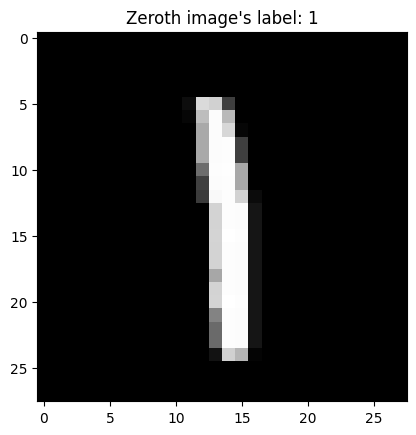

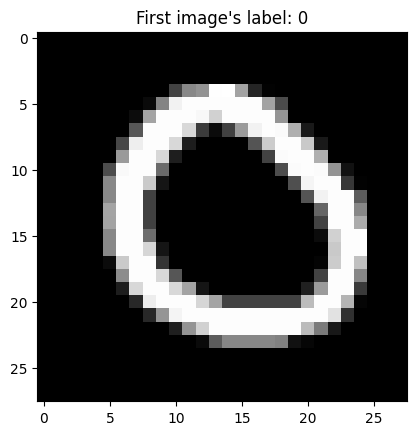

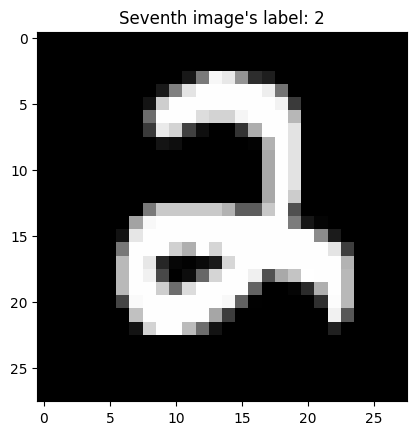

In [ ]:
######################################################################
# main
######################################################################

# def main():

# fix random seed
np.random.seed(0)
torch.manual_seed(0)

# load data with correct file path

### ========== TODO : START ========== ###
data_directory_path =  "/content/drive/My Drive/UCLA/Winter_2025/CM146_ML/pset3"
### ========== TODO : END ========== ###

# X.shape = (n_examples, n_features)
# y.shape = (n_examples, )
X_train, y_train = load_data(os.path.join(data_directory_path, "ps3_train.csv"))
X_valid, y_valid = load_data(os.path.join(data_directory_path, "ps3_valid.csv"))
X_test, y_test = load_data(os.path.join(data_directory_path, "ps3_test.csv"))

### ========== TODO : START ========== ###
### part a: print out three training images with different labels

plot_img(X_train[0])
plt.title(f"Zeroth image's label: {y_train[0]}")
plot_img(X_train[1])
plt.title(f"First image's label: {y_train[1]}")
plot_img(X_train[7])
plt.title(f"Seventh image's label: {y_train[7]}")

### ========== TODO : END ========== ###

print("Data preparation...")
print(X_train.shape, X_test.shape)

### ========== TODO : START ========== ###
### part b: convert numpy arrays to tensors

# Use:
# x_np = torch.from_numpy(np_array)
# Note: load_data loads data as NumPy arrays

X_train = torch.from_numpy(X_train)
y_train = torch.from_numpy(y_train)

X_valid = torch.from_numpy(X_valid)
y_valid = torch.from_numpy(y_valid)

X_test = torch.from_numpy(X_test)
y_test = torch.from_numpy(y_test)

### ========== TODO : END ========== ###

### ========== TODO : START ========== ###
### part c: prepare dataloaders for training, validation, and testing
###         we expect to get a batch of pairs (x_n, y_n) from the dataloader

# Prepare train_loader, valid_loader, and test_loader by using TensorDataset
# and DataLoader. (This is from torch.utils.data) We expect to get a batch
# of pairs (xn, yn) from the dataloader. Please set the batch size to 10.

train_loader = DataLoader(TensorDataset(X_train,y_train), batch_size=10)
valid_loader = DataLoader(TensorDataset(X_valid,y_valid), batch_size=10)
test_loader = DataLoader(TensorDataset(X_test,y_test), batch_size=10)

### ========== TODO : END ========== ###


### ========== TODO : START ========== ###
### part e: prepare OneLayerNetwork, criterion, and optimizer

# Create an instance of OneLayerNetwork, set up a criterion with
# torch.nn.CrossEntropyLoss, and set up a SGD optimizer with learning
# rate 0.0005 by using torch.optim.SGD

model_one = OneLayerNetwork()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_one.parameters(), lr=0.0005)

# optimizer = torch.optim.SGD(model_one.parameters(), lr=0.0005)

### ========== TODO : END ========== ###

print("Start training OneLayerNetwork...")
results_one = train(model_one, criterion, optimizer, train_loader, valid_loader, epochs=31)
print("Done!")

### ========== TODO : START ========== ###
### part h: prepare TwoLayerNetwork, criterion, and optimizer

model_two = TwoLayerNetwork()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_two.parameters(), lr=0.0005)

# optimizer = torch.optim.SGD(model_two.parameters(), lr=0.0005)

### ========== TODO : END ========== ###

print("Start training TwoLayerNetwork...")
results_two = train(model_two, criterion, optimizer, train_loader, valid_loader, epochs=31)
print("Done!")

one_train_loss, one_valid_loss, one_train_acc, one_valid_acc = results_one
two_train_loss, two_valid_loss, two_train_acc, two_valid_acc = results_two

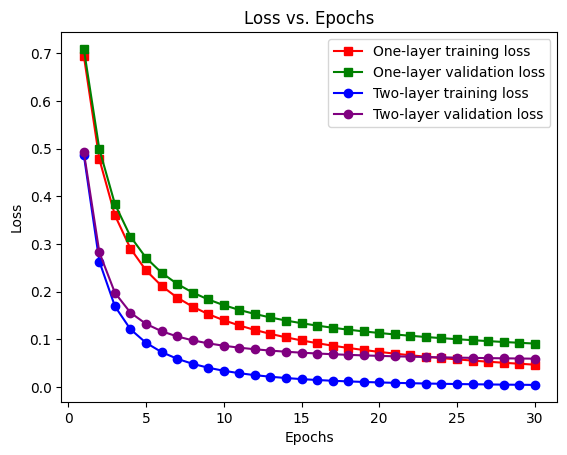

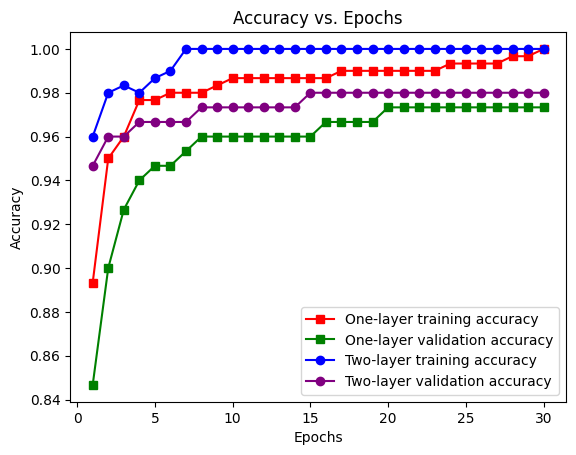

Test accuracy for one-layer network:  tensor(0.9667)
test accuracy of two-layer network:  tensor(0.9667)


In [ ]:

### ========== TODO : START ========== ###
### part i: generate a plot to comare one_train_loss, one_valid_loss, two_train_loss, two_valid_loss

epochs = np.arange(1, 31)
plt.plot(epochs, one_train_loss, color='red', marker='s', label='One-layer training loss')
plt.plot(epochs, one_valid_loss, color='green', marker='s', label='One-layer validation loss')
plt.plot(epochs, two_train_loss, color='blue', marker='o', label='Two-layer training loss')
plt.plot(epochs, two_valid_loss, color='purple', marker='o', label='Two-layer validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

### ========== TODO : END ========== ###

### ========== TODO : START ========== ###
### part j: generate a plot to comare one_train_acc, one_valid_acc, two_train_acc, two_valid_acc

epochs = np.arange(1, 31)
plt.plot(epochs, one_train_acc, color='red', marker='s', label='One-layer training accuracy')
plt.plot(epochs, one_valid_acc, color='green', marker='s', label='One-layer validation accuracy')
plt.plot(epochs, two_train_acc, color='blue', marker='o', label='Two-layer training accuracy')
plt.plot(epochs, two_valid_acc, color='purple', marker='o', label='Two-layer validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()
plt.show()

### ========== TODO : END ========== ##

### ========== TODO : START ========== ###
### part k: calculate the test accuracy
# Calculate and report the test accuracy of both the one-layer network and the two-layer network.

print("Test accuracy for one-layer network: ", evaluate_acc(model_one, test_loader))
print("test accuracy of two-layer network: ", evaluate_acc(model_two, test_loader))

### ========== TODO : END ========== ###

### ========== TODO : START ========== ###
### part l: replace the SGD optimizer with the Adam optimizer and do the experiments again
### ========== TODO : END ========== ###



